# 🏏 Cricket Score Predictor using Machine Learning

This notebook predicts cricket match scores using Random Forest Regression algorithm.

## 📊 Dataset
- **IPL Dataset**: 76,014 ball-by-ball records
- **Source**: cricsheet.org

## 🎯 Features Used
1. Current runs scored
2. Current wickets fallen
3. Current overs bowled
4. Striker's runs
5. Non-striker's runs


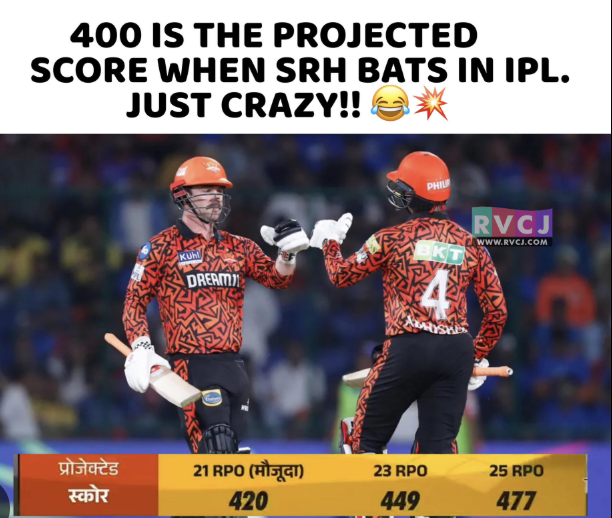

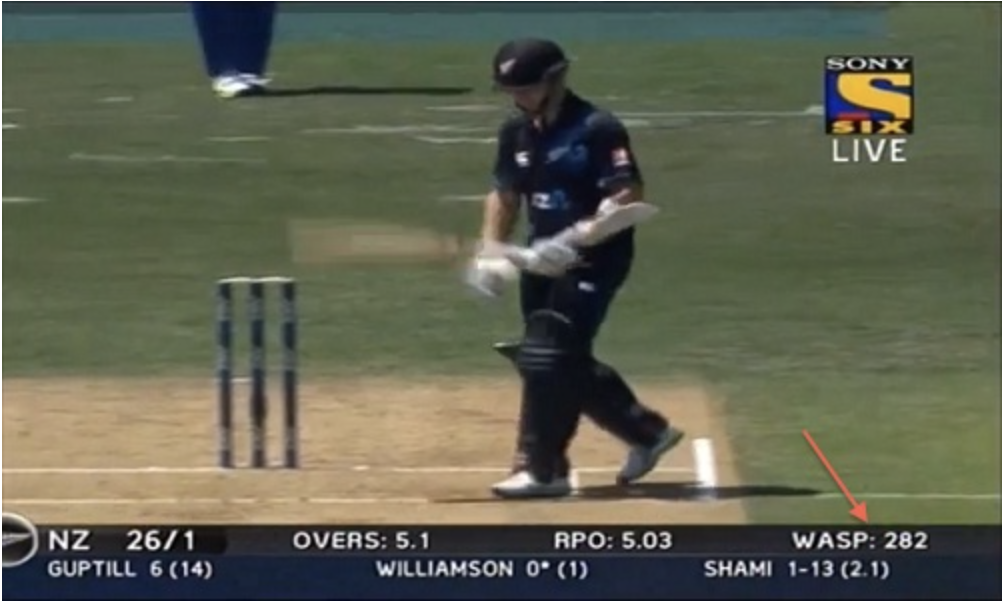

Traditional cricket score projections (like those shown during live matches — “Projected Score” or “WASP”) often rely only on the current run rate (RPO) to estimate the final score.

For example, if a team scores 100 runs in 10 overs (RPO = 10), a simple projection would predict a final score of 200 runs after 20 overs.

However, this single-feature approach is not accurate because it ignores several critical factors such as:


*  The number of wickets lost (affecting batting depth and risk-taking)
*  The current over (powerplay vs. death overs dynamics)
*  The performance of individual batsmen (striker and non-striker contributions)
*  The momentum of the innings (runs acceleration or slowdown)





Hence, in this project, we use Machine Learning (Random Forest Regression) to predict the final score based on multiple real-time match features, including:
1. Current runs
2. Wickets fallen
3. Overs completed
4. Striker’s runs
5. Non-striker’s runs


## Step 1: Import Required Libraries


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


## Step 2: Load and Explore the Dataset


In [2]:
# Load the dataset
dataset = pd.read_csv('ipl.csv')

print("📊 Dataset Information:")
print(f"Shape: {dataset.shape}")
print(f"Total records: {len(dataset):,}")
print(f"\nColumns: {list(dataset.columns)}")
print("\n" + "="*70)
print("📋 First few rows:")
print("="*70)
dataset.head()


📊 Dataset Information:
Shape: (76014, 15)
Total records: 76,014

Columns: ['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker', 'non-striker', 'total']

📋 First few rows:


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


## Step 3: Extract Features and Labels


In [3]:
# Extract features (runs, wickets, overs, striker, non-striker)
X = dataset.iloc[:,[7,8,9,12,13]].values

# Extract label (total score)
y = dataset.iloc[:, 14].values

print("✅ Features extracted successfully!")
print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"\nFeatures used: runs, wickets, overs, striker, non-striker")
print(f"Target variable: total score")


✅ Features extracted successfully!
Features shape: (76014, 5)
Labels shape: (76014,)

Features used: runs, wickets, overs, striker, non-striker
Target variable: total score


## Step 4: Split Data into Training and Testing Sets


In [4]:
# Split data: 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print("✅ Data split successfully!")
print(f"Training set: {X_train.shape[0]:,} samples")
print(f"Testing set: {X_test.shape[0]:,} samples")


✅ Data split successfully!
Training set: 57,010 samples
Testing set: 19,004 samples


## Step 5: Feature Scaling


In [5]:
# Apply feature scaling
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

print("✅ Feature scaling completed!")
print("StandardScaler applied to normalize features")


✅ Feature scaling completed!
StandardScaler applied to normalize features


## Step 6: Train the Random Forest Model


In [6]:
# Train Random Forest Regression model
print("🤖 Training Random Forest Regression Model...")
print("(This may take a few moments...)")

rf_model = RandomForestRegressor(n_estimators=100, max_features=None, random_state=0)
rf_model.fit(X_train_scaled, y_train)

print("✅ Model training completed!")


🤖 Training Random Forest Regression Model...
(This may take a few moments...)
✅ Model training completed!


## Step 7: Evaluate Model Performance


In [7]:
# Evaluate the model
def custom_accuracy(y_test, y_pred, threshold):
    """Calculate custom accuracy based on threshold"""
    right = 0
    l = len(y_pred)
    for i in range(0, l):
        if abs(y_pred[i] - y_test[i]) <= threshold:
            right += 1
    return (right/l) * 100

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Calculate metrics
r2_score = rf_model.score(X_test_scaled, y_test) * 100
acc_10 = custom_accuracy(y_test, y_pred, 10)
acc_20 = custom_accuracy(y_test, y_pred, 20)

print("📈 Model Performance Metrics:")
print("="*70)
print(f"R-squared Score: {r2_score:.2f}%")
print(f"Custom Accuracy (±10 runs): {acc_10:.2f}%")
print(f"Custom Accuracy (±20 runs): {acc_20:.2f}%")
print("="*70)


📈 Model Performance Metrics:
R-squared Score: 67.34%
Custom Accuracy (±10 runs): 65.27%
Custom Accuracy (±20 runs): 83.70%


## Step 8: Visualize Predictions


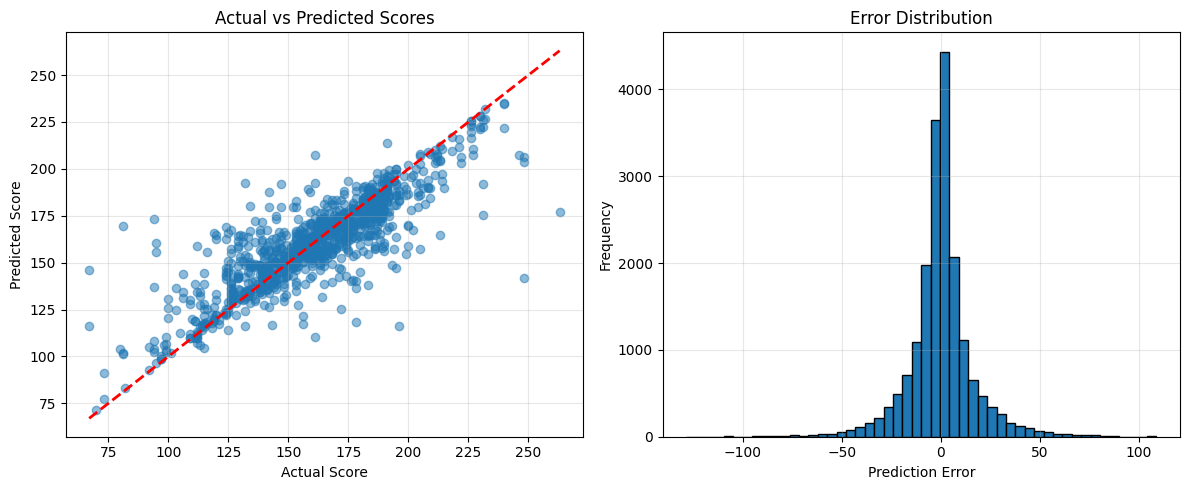


Mean Error: 0.09 runs
Standard Deviation: 16.68 runs


In [8]:
# Create visualization
plt.figure(figsize=(12, 5))

# Scatter plot: Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test[:1000], y_pred[:1000], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted Scores')
plt.grid(True, alpha=0.3)

# Error distribution
plt.subplot(1, 2, 2)
errors = y_pred - y_test
plt.hist(errors, bins=50, edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Error Distribution')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nMean Error: {np.mean(errors):.2f} runs")
print(f"Standard Deviation: {np.std(errors):.2f} runs")


## Step 9: Make Custom Predictions


In [9]:
# Function to predict score
def predict_score(runs, wickets, overs, striker, non_striker):
    """Predict final score based on current match state"""
    input_data = np.array([[runs, wickets, overs, striker, non_striker]])
    input_scaled = sc.transform(input_data)
    prediction = rf_model.predict(input_scaled)
    return prediction[0]

# Example predictions
print("🎯 Example Predictions:")
print("="*70)

examples = [
    (100, 0, 13, 50, 50, "Good start, no wickets"),
    (60, 3, 10, 30, 20, "Moderate start, some wickets"),
    (40, 5, 8, 15, 15, "Slow start, many wickets"),
    (150, 1, 15, 80, 60, "Great position"),
]

for runs, wickets, overs, striker, non_striker, desc in examples:
    predicted = predict_score(runs, wickets, overs, striker, non_striker)
    print(f"\n📊 {desc}")
    print(f"   Current: {runs} runs, {wickets} wickets, {overs} overs")
    print(f"   Batsmen: Striker={striker}, Non-striker={non_striker}")
    print(f"   ➜ Predicted Final Score: {predicted:.1f} runs")

print("\n" + "="*70)


🎯 Example Predictions:

📊 Good start, no wickets
   Current: 100 runs, 0 wickets, 13 overs
   Batsmen: Striker=50, Non-striker=50
   ➜ Predicted Final Score: 176.4 runs

📊 Moderate start, some wickets
   Current: 60 runs, 3 wickets, 10 overs
   Batsmen: Striker=30, Non-striker=20
   ➜ Predicted Final Score: 149.8 runs

📊 Slow start, many wickets
   Current: 40 runs, 5 wickets, 8 overs
   Batsmen: Striker=15, Non-striker=15
   ➜ Predicted Final Score: 78.8 runs

📊 Great position
   Current: 150 runs, 1 wickets, 15 overs
   Batsmen: Striker=80, Non-striker=60
   ➜ Predicted Final Score: 214.0 runs



## Step 10: Interactive Prediction


In [10]:
# Change these values to predict for your custom match state
custom_runs = 120
custom_wickets = 2
custom_overs = 12
custom_striker = 60
custom_non_striker = 50

# Make prediction
predicted_score = predict_score(custom_runs, custom_wickets, custom_overs,
                                custom_striker, custom_non_striker)

print("🎯 Custom Prediction:")
print("="*70)
print(f"Current Match State:")
print(f"  • Runs: {custom_runs}")
print(f"  • Wickets: {custom_wickets}")
print(f"  • Overs: {custom_overs}")
print(f"  • Striker: {custom_striker}")
print(f"  • Non-striker: {custom_non_striker}")
print(f"\n➜ Predicted Final Score: {predicted_score:.1f} runs")
print("="*70)


🎯 Custom Prediction:
Current Match State:
  • Runs: 120
  • Wickets: 2
  • Overs: 12
  • Striker: 60
  • Non-striker: 50

➜ Predicted Final Score: 204.7 runs
